In [75]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
%matplotlib inline

### Cleaning and Preprocessing Data

In [2]:
sales_data = pd.read_csv('data/sales2019_1.csv')

In [3]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


File names start from sales2019_1,... to sales2019_12 which are the months of 2019 relatively.
We can create a for loop to read the other months and concatenate them together:

In [4]:
for month in range(2, 13):
    sales_data = pd.concat(objs = [sales_data, pd.read_csv(f'data/sales2019_{month}.csv')])

In [5]:
sales_data.info()    # Check the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
sales_data.tail()    # Check the last 5 rows of the dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


We can see that the last index (25116) does not match the number of entries (186850).
It means the indexes must be duplicated. Therefore, we have to reset the indexes:

In [7]:
sales_data.reset_index(drop = True, inplace=True)

Order Date column has 'Order Date' values so that we cannot convert the column to datetime format.
The rows contain 'Order Date' values are also duplicates of the heading.
Thus, we must remove them from the dataframe:

In [8]:
drop_indexes = sales_data[sales_data['Order Date'] == 'Order Date'].index

sales_data.drop(index = drop_indexes, inplace=True)

Remove empty rows:

In [9]:
sales_data.dropna(inplace=True)

Now we can convert the Order Date column from string format to datetime format:

In [10]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [11]:
sales_data.head()    # Check the head of the dataframe again

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


Create Month column with values extracted from Order Date column:

In [12]:
sales_data['Month'] = sales_data['Order Date'].apply(lambda x: x.month)

Do the same thing with new column named Hour:

In [13]:
sales_data['Hour'] = sales_data['Order Date'].apply(lambda x: x.hour)

Now we need to create a new column called Revenue. As we know, Revenue = Quantity Ordered * Price Each. However, the Quantity Ordered and Price Each columns are in string format. So, we need to convert them to numbers:

In [14]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])    # Convert Quantity Ordered column to numbers

In [15]:
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])    # Convert Price Each column to numbers

In [16]:
sales_data['Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']    # Create Revenue column

As we can see in the dataframe, each Purchase Address has a city name in the middle. In order to extract the city name and put into the new City column, we need to split each Purchase Address by comma (,) and then take the city name:

In [17]:
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1][1:])

Let's also add Day of Week column to the dataframe:

In [18]:
sales_data['Day of Week'] = sales_data['Order Date'].apply(lambda x: x.day_of_week)

In [19]:
sales_data.head()    # Check the dataframe to see if we've done correctly so far

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Revenue,City,Day of Week
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21,700.00,Boston,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14,14.95,Portland,0
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13,23.98,San Francisco,3
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20,149.99,Los Angeles,5
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,11.99,Austin,4


As the attribute .day_of_week returns numbers from 0 - 6, which actually are Monday - Sunday relatively, we need to change the numbers into days of week:

In [20]:
dow_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}    # Create a day-of-week dictionary

In [21]:
# Mapping values in Day of Week column with values in the dictionary and reassign the column
sales_data['Day of Week'] = sales_data['Day of Week'].map(dow_dict)

In [22]:
sales_data.head()    # Check the dataframe again

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Revenue,City,Day of Week
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21,700.00,Boston,Tue
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14,14.95,Portland,Mon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13,23.98,San Francisco,Thu
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20,149.99,Los Angeles,Sat
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,11.99,Austin,Fri


### Analyzing Data & Reporting

#### Question 1: Which month has the highest revenue? How much is it?

To answer the question, we need to get the sum of the Revenue column by each month:

In [23]:
revenue_by_month = sales_data.groupby(by = 'Month').sum()['Revenue']

In [24]:
revenue_by_month.head()    # Check the new dataframe

Month
1    1.822257e+06
2    2.202022e+06
3    2.807100e+06
4    3.390670e+06
5    3.152607e+06
Name: Revenue, dtype: float64

In [25]:
revenue_by_month.idxmax()    # The month which has the highest Revenue

12

In [26]:
revenue_by_month.max()    #The highest Revenue by month

4613443.34000153

Let's create a barplot:

In [27]:
# Create fontdict for plot titles

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20}

Text(0.5, 1.0, 'Revenue by Month')

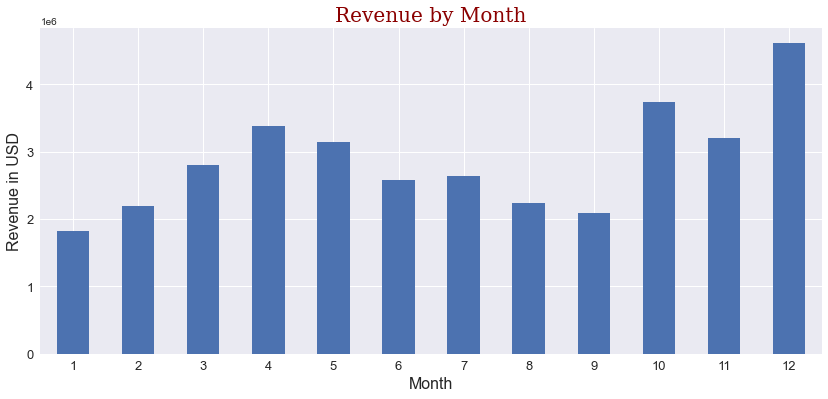

In [28]:
plt.style.use('seaborn')
plt.figure(figsize=(14,6))
revenue_by_month.plot.bar()
plt.xlabel('Month', fontsize = 16)
plt.xticks(rotation = 0, fontsize = 13)
plt.ylabel('Revenue in USD', fontsize = 16)
plt.yticks(fontsize = 13)
plt.title('Revenue by Month', fontdict = font)

#### Question 2: Which city has the highest revenue?

To answer the question, we need to get the sum of the Revenue by each city:

In [29]:
revenue_by_city = sales_data.groupby(by = 'City').sum()['Revenue']

In [30]:
revenue_by_city.head()    # Check the new dataframe

City
Atlanta        2.795499e+06
Austin         1.819582e+06
Boston         3.661642e+06
Dallas         2.767975e+06
Los Angeles    5.452571e+06
Name: Revenue, dtype: float64

In [31]:
revenue_by_city.idxmax()    # The city which has the highest revenue

'San Francisco'

Let's create a barplot:

Text(0.5, 1.0, 'Revenue by City')

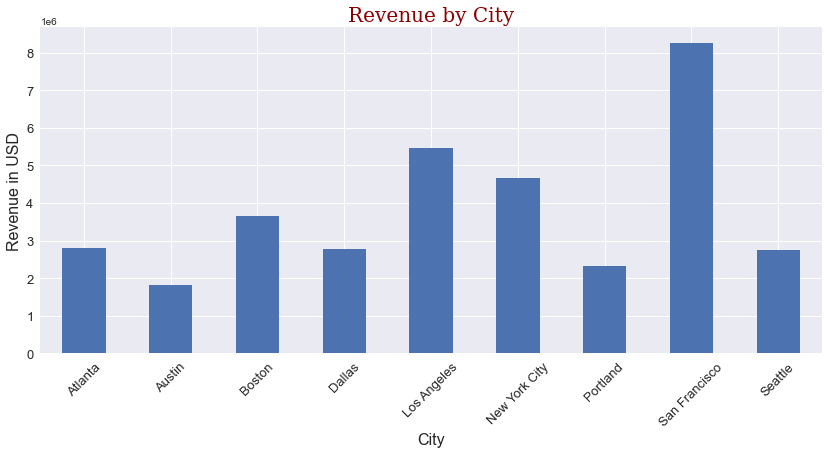

In [32]:
plt.figure(figsize=(14,6))
revenue_by_city.plot.bar()
plt.xlabel('City', fontsize = 16)
plt.xticks(fontsize = 13, rotation = 45)
plt.ylabel('Revenue in USD', fontsize = 16)
plt.yticks(fontsize = 13)
plt.title('Revenue by City', fontdict = font)

#### Question 3: In which period of time does the company need to run commercial ads in order to attract customers?

To answer this question, we need to get the number of orders in each hour of the day:

In [33]:
orders_by_hour = sales_data.groupby(by = 'Hour').count()['Quantity Ordered']

In [34]:
orders_by_hour.head()    # Check the new dataframe

Hour
0    3910
1    2350
2    1243
3     831
4     854
Name: Quantity Ordered, dtype: int64

In [35]:
orders_by_hour.sort_values(ascending = False).head(8)  # Check the top 8 periods of time which have the highest number of orders

Hour
19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
Name: Quantity Ordered, dtype: int64

We can create a lineplot for a closer look:

Text(0.5, 1.0, 'Number of Orders by Hour')

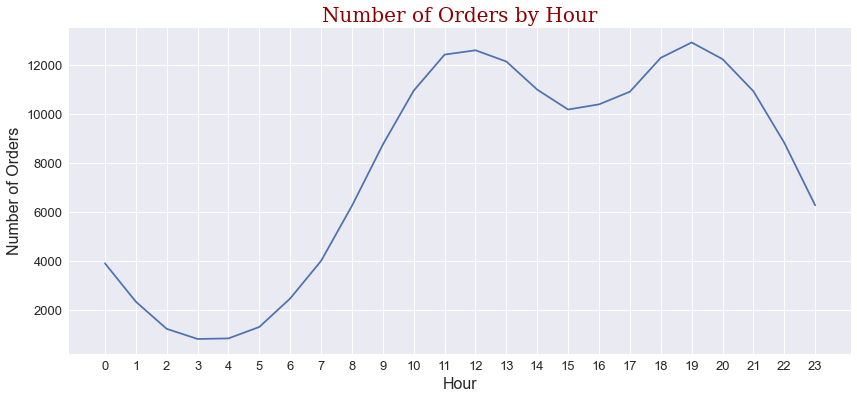

In [36]:
plt.figure(figsize=(14,6))
orders_by_hour.plot.line()
plt.xlabel('Hour', fontsize = 16)
plt.xticks(range(0,24),fontsize = 13)
plt.ylabel('Number of Orders', fontsize = 16)
plt.yticks(fontsize = 13)
plt.title('Number of Orders by Hour', fontdict = font)

As we can see in the plot, the number of orders reaches its peaks in the periods of time between 11:00 and 13:00 as well as between 18:00 and 20:00. Therefore, in order to attract as many customers as possible, the company may want to run their commercial ads in these periods of time.

We can also dive deeper into the data for every hour of each day of week:

In [37]:
orders_by_hndow = sales_data.groupby(by = ['Day of Week','Hour']).count()['Quantity Ordered'].unstack(level = -1)

In [38]:
orders_by_hndow

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,593,335,175,98,108,183,349,533,899,1195,...,1546,1380,1457,1522,1710,1888,1791,1530,1256,920
Mon,563,311,172,125,125,190,354,582,897,1238,...,1550,1367,1526,1577,1692,1863,1714,1565,1249,901
Sat,541,330,182,118,127,168,381,550,910,1266,...,1600,1462,1488,1560,1747,1846,1748,1537,1234,906
Sun,545,346,165,107,131,194,326,584,847,1221,...,1561,1389,1435,1590,1807,1830,1774,1535,1336,910
Thu,547,331,163,126,131,176,351,563,881,1303,...,1511,1480,1500,1502,1720,1814,1773,1518,1263,899
Tue,556,351,181,126,121,189,375,618,975,1311,...,1663,1570,1483,1584,1864,1830,1801,1642,1209,875
Wed,565,346,205,131,111,221,346,581,847,1214,...,1553,1527,1495,1564,1740,1834,1627,1594,1275,864


Text(0.56, 1.01, 'Number of Orders by DOW and Hour')

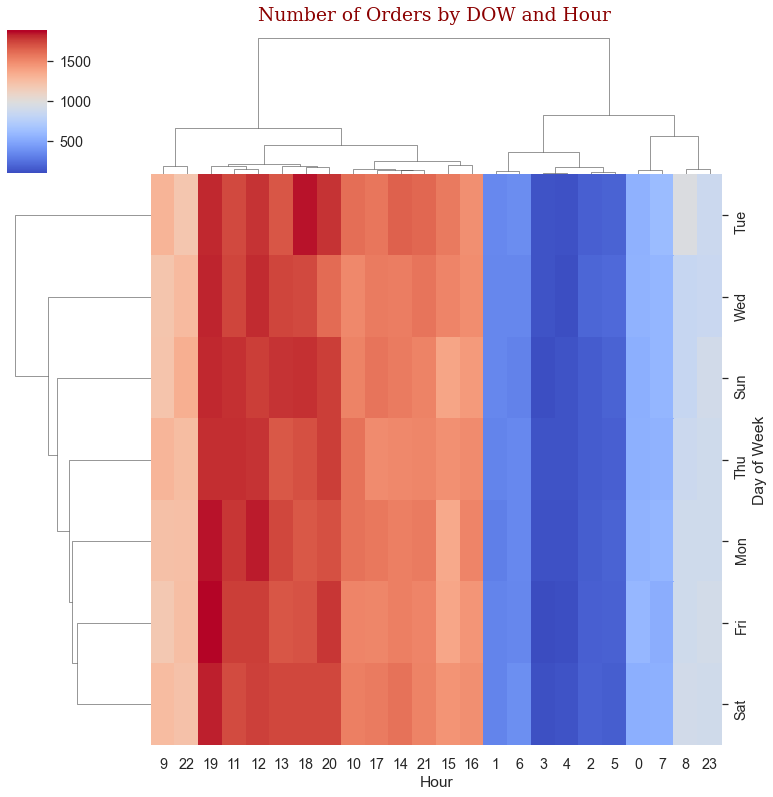

In [39]:
sns.set(font_scale = 1.3)
g = sns.clustermap(orders_by_hndow, figsize=(11,11), cmap = 'coolwarm')
g.fig.suptitle('Number of Orders by DOW and Hour', x = 0.56, y = 1.01, fontdict = font)

According to the plot, we can tell more details about in which time periods of each day of week should the company run their ads for best efficiency. For example, 19:00 - 20:00 of all days, in combination with 12:00 - 13:00 of Mondays and Wednesdays,...

#### Question 4: What product is sold the most? Why?

To answer the question, we need to get the sum of Quantity Ordered by each product:

In [40]:
quant_by_prod = sales_data.groupby(by = 'Product').sum()['Quantity Ordered']

In [41]:
quant_by_prod.sort_values(ascending=False).head()    # Check the top 5 most sold products

Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

Let's create a barplot:

Text(0.5, 1.0, 'Quantity Ordered by Product')

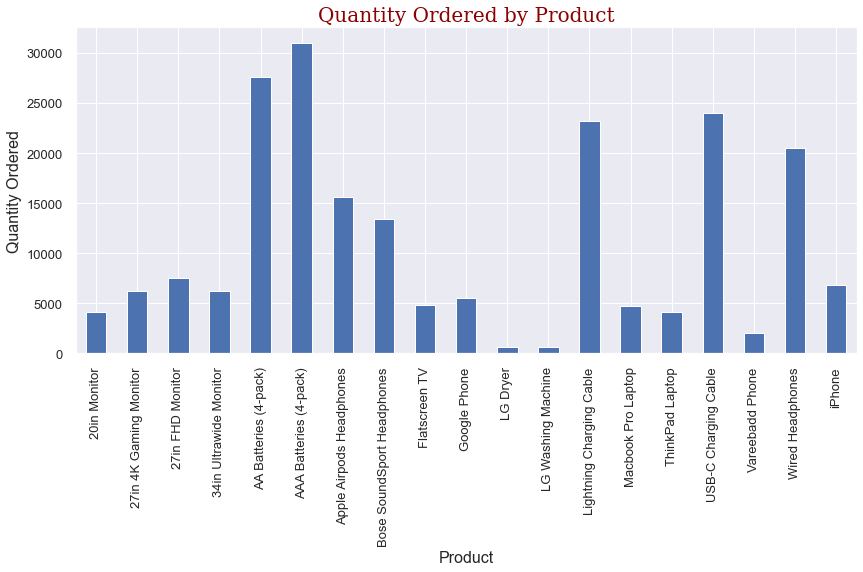

In [42]:
plt.figure(figsize=(14,6))
quant_by_prod.plot.bar()
plt.xlabel('Product', fontsize = 16)
plt.xticks(fontsize = 13, rotation = 90)
plt.ylabel('Quantity Ordered', fontsize = 16)
plt.yticks(fontsize = 13)
plt.title('Quantity Ordered by Product', fontdict = font)

As we can see in the plot, AAA Batteries (4-pack) and AA Batteries (4-pack) have the highest quantity ordered. In contrast, LG Dryer and LG Washing Machine have the lowest.

In order to find out the reason why a product has higher quantity ordered than the others, we should look at their prices, brands, quality. However, we don't have enough information on brands and quality for every product. So we will focus on the prices:

In [43]:
# Create a dictionary with keys are the product names and values are their prices

prod_price_dict = dict(zip(sales_data['Product'], sales_data['Price Each']))

In [44]:
prod_price_dict    # Check the dictionary

{'iPhone': 700.0,
 'Lightning Charging Cable': 14.95,
 'Wired Headphones': 11.99,
 '27in FHD Monitor': 149.99,
 'AAA Batteries (4-pack)': 2.99,
 '27in 4K Gaming Monitor': 389.99,
 'USB-C Charging Cable': 11.95,
 'Bose SoundSport Headphones': 99.99,
 'Apple Airpods Headphones': 150.0,
 'Macbook Pro Laptop': 1700.0,
 'Flatscreen TV': 300.0,
 'Vareebadd Phone': 400.0,
 'AA Batteries (4-pack)': 3.84,
 'Google Phone': 600.0,
 '20in Monitor': 109.99,
 '34in Ultrawide Monitor': 379.99,
 'ThinkPad Laptop': 999.99,
 'LG Dryer': 600.0,
 'LG Washing Machine': 600.0}

In [45]:
# Create sum by product dataframe

sum_by_prod = sales_data.groupby(by = 'Product').sum()

In [46]:
sum_by_prod.head()    # Check the head of the dataframe

,Quantity Ordered,Price Each,Month,Hour,Revenue
Product,,,,,
20in Monitor,4129,451068.99,29336,58764,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,90916,2435097.56
27in FHD Monitor,7550,1125974.93,52558,107540,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,89076,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,298342,106118.40


Notice that the Price Each also got summed. Now we need to replace the summed values with the correct Price Each values:

In [47]:
# Mapping the index of the dataframe with the dictionary created above and assign the values into Price Each column

sum_by_prod['Price Each'] = sum_by_prod.index.map(prod_price_dict)

In [48]:
sum_by_prod[['Quantity Ordered','Price Each']]    # Check the dataframe with the 2 specified columns

,Quantity Ordered,Price Each
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84
AAA Batteries (4-pack),31017,2.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
Flatscreen TV,4819,300.00


Begin plotting:

<ipython-input-74-d8814e22e59b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sum_by_prod.index, rotation = 90, fontsize = 13)


Text(0, 0.5, 'Price Each')

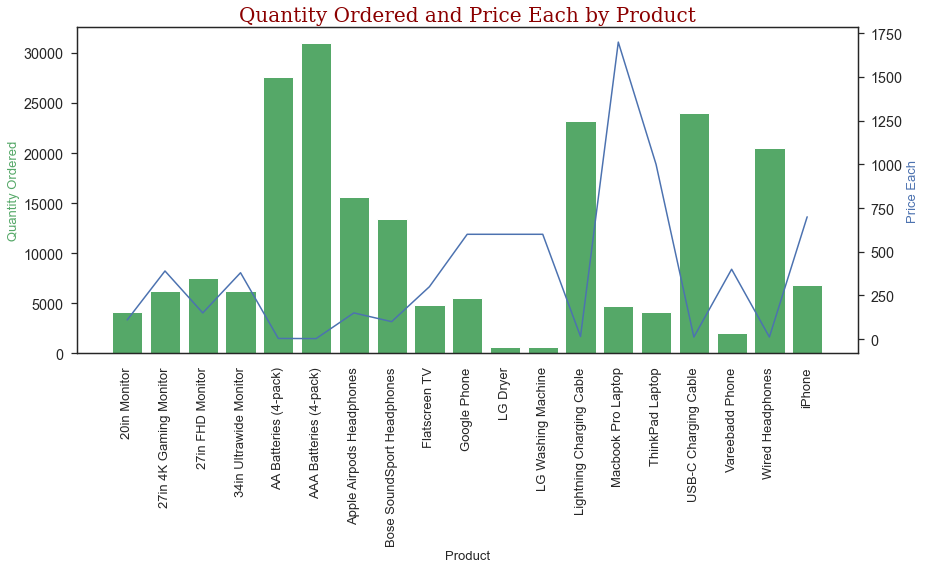

In [74]:
plt.style.use('seaborn-ticks')
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.bar(sum_by_prod.index, sum_by_prod['Quantity Ordered'], color = 'g')
ax1.set_xticklabels(sum_by_prod.index, rotation = 90, fontsize = 13)
ax1.set_xlabel('Product', fontsize = 13)
ax1.set_ylabel('Quantity Ordered', fontsize = 13, color = 'g')
ax1.set_title('Quantity Ordered and Price Each by Product', fontdict=font)

ax2 = ax1.twinx()
ax2.plot(sum_by_prod.index, sum_by_prod['Price Each'], color = 'b')
ax2.set_ylabel('Price Each', fontsize = 13, color = 'b')

The plot shows that there is some correlation between the price and quantity ordered of these products. The products with highest quantity ordered, which are AA Batteries and AAA Batteries, have lowest prices while the products with low quantity ordered, which are LG Dryer, LG, Washing Machine, Macbook Pro Laptop and ThinkPadLaptop, have high prices.

#### Question 5: Which pair of products is most often sold together?

In [50]:
# Create a dataframe including rows which have duplicated Order ID

orderID_dups = sales_data[sales_data['Order ID'].duplicated(keep = False)]

In [51]:
# Create a new column with each value contains all Products from the same Order ID

orderID_dups['All Products'] = orderID_dups.groupby(by = 'Order ID')['Product'].transform(lambda x: ', '.join(x))

<ipython-input-51-a7ce966d3e3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderID_dups['All Products'] = orderID_dups.groupby(by = 'Order ID')['Product'].transform(lambda x: ', '.join(x))


In [52]:
orderID_dups.head()    # Check the dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Revenue,City,Day of Week,All Products
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,11.95,Austin,Mon,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,11.99,Austin,Mon,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,150.00,Los Angeles,Wed,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,11.52,Los Angeles,Wed,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11,400.00,New York City,Thu,"Vareebadd Phone, Wired Headphones"


In [61]:
# Create a counting object

count = Counter()

# Using a for loop to count every possible 2-combinations in each value of the All Products column

for products in orderID_dups['All Products']:
    product_list = products.split(", ")
    count.update(Counter(combinations(product_list, 2)))

# Sorting the result in descending order and convert into a dataframe

count_of_combinations = pd.DataFrame(count.most_common(), columns=['Combinations','Counts'])

In [62]:
count_of_combinations.head()    # Check the dataframe

,Combinations,Counts
0,"(iPhone, Lightning Charging Cable)",2140
1,"(Google Phone, USB-C Charging Cable)",2116
2,"(iPhone, Wired Headphones)",987
3,"(Google Phone, Wired Headphones)",949
4,"(iPhone, Apple Airpods Headphones)",799


In [68]:
# Remove parentheses
count_of_combinations['Combinations'] = count_of_combinations['Combinations'].apply(lambda x: ', '.join(x))

In [69]:
count_of_combinations.head()

,Combinations,Counts
0,"iPhone, Lightning Charging Cable",2140
1,"Google Phone, USB-C Charging Cable",2116
2,"iPhone, Wired Headphones",987
3,"Google Phone, Wired Headphones",949
4,"iPhone, Apple Airpods Headphones",799


As we can see in the dataframe, the two most-sold-together pairs of products are Iphone & Lightning Charging Cable and Google Phone & USB-C Charging Cable. In order to promote sales of the low-order-quantity products such as LG Dryer or LG Washing Machine (details in question 4's plot), the company should give away coupons, vouchers or discounts on these products' prices to buyers who have purchased the two most-sold-together pairs of products.

# Thanks for checking out my project!